## CSC-722: Machine Learning Fundamentals
## Assignemnt: Code for Logistic Regression & Naive Bayes
## Submitted by: Prajwol Tiwari
### ---------------------------------------------------

Importing NumPy and Pandas libraries for numerical computations and data manipulation, respectively.

In [1]:
import numpy as np
import pandas as pd

Installing scikit-learn package using pip, a Python package manager, to make it available for use in the current environment.

In [2]:
!pip install scikit-learn

Importing specific functions and classes from scikit-learn metrics module to use them for evaluating model performance.


In [3]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay, roc_auc_score, log_loss
)

In [4]:
# Importing Matplotlib library for data visualization, particularly for creating plots.
import matplotlib.pyplot as plt

# Importing Seaborn library for statistical data visualization, providing a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns


**Assignment**:

Use this dataset:

https://archive.ics.uci.edu/dataset/244/fertility

fix and fit the code and Report the results

# -----------------------------------------------------------------------------------------

Installing the ucimlrepo package using pip to access datasets from the UCI Machine Learning Repository.

In [5]:
!pip install ucimlrepo

In [6]:
# Importing fetch_ucirepo function from ucimlrepo to fetch datasets from the UCI Machine Learning Repository.
from ucimlrepo import fetch_ucirepo

# Fetching the dataset with ID 244 from the UCI Machine Learning Repository.
fertility = fetch_ucirepo(id=244)

# Extracting the features and targets data from the fetched dataset and storing them in pandas dataframes.
X_df = fertility.data.features  # Features dataframe
y_df = fertility.data.targets   # Targets dataframe

# Printing the metadata information of the fetched dataset.
print(fertility.metadata)

# Printing the variable information of the fetched dataset.
print(fertility.variables)


{'uci_id': 244, 'name': 'Fertility', 'repository_url': 'https://archive.ics.uci.edu/dataset/244/fertility', 'data_url': 'https://archive.ics.uci.edu/static/public/244/data.csv', 'abstract': '100 volunteers provide a semen sample analyzed according to the WHO 2010 criteria. Sperm concentration are related to socio-demographic data, environmental factors, health status, and life habits', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 100, 'num_features': 9, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['diagnosis'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5Z01Z', 'creators': ['David Gil', 'Jose Girela'], 'intro_paper': {'title': 'Predicting seminal quality with artificial intelligence methods', 'authors': 'David Gil, J. L. Girela, Joaquin De Juan, M. Jose G

In [7]:
# Displaying the first few rows of the features dataframe (X_df) to inspect the structure and content of the data.
X_df.head()


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting
0,-0.33,0.69,0,1,1,0,0.8,0,0.88
1,-0.33,0.94,1,0,1,0,0.8,1,0.31
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50


In [8]:
# Displaying the first few rows of the targets dataframe (y_df) to inspect the structure and content of the target variable data.
y_df.head()


,diagnosis
0,N
1,O
2,N
3,N
4,O


In [9]:
# Converting the features dataframe (X_df) to a NumPy array (X) to prepare for implememnting Logistic Regression.
X = X_df.to_numpy()

# Converting the targets dataframe (y_df) to a NumPy array (y) and replacing 'N' with 0 and 'O' with 1 for binary classification.
y = y_df.diagnosis.replace({'N': 0, 'O': 1}).to_numpy()


Logistic Model

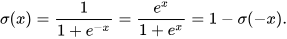

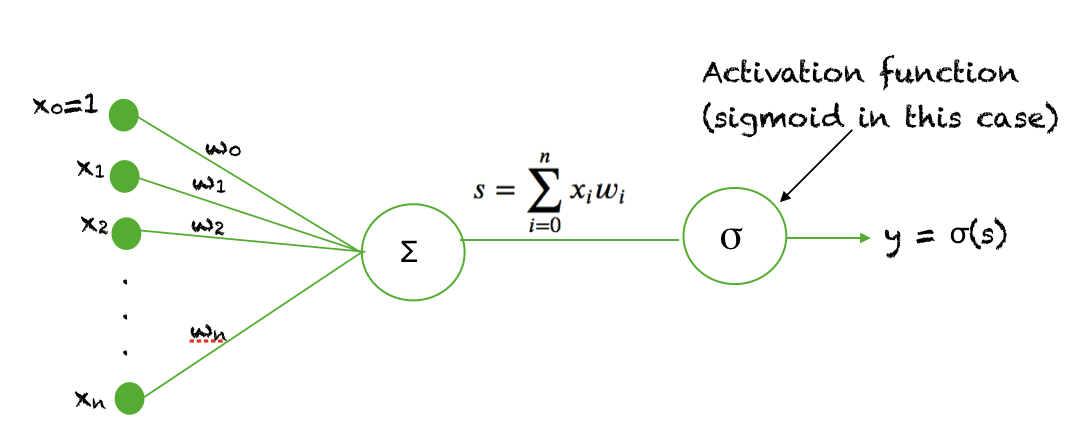

# Why The Sigmoid Function Is Important In Neural Networks?

If we use a linear activation function in a neural network, then this model can only learn linearly separable problems. However, with the addition of just one hidden layer and a sigmoid activation function in the hidden layer, the neural network can easily learn a non-linearly separable problem. Using a non-linear function produces non-linear boundaries and hence, the sigmoid function can be used in neural networks for learning complex decision functions.

The only non-linear function that can be used as an activation function in a neural network is one which is monotonically increasing. So for example, sin(x) or cos(x) cannot be used as activation functions. Also, the activation function should be defined everywhere and should be continuous everywhere in the space of real numbers. The function is also required to be differentiable over the entire space of real numbers.

Typically a back propagation algorithm uses gradient descent to learn the weights of a neural network. To derive this algorithm, the derivative of the activation function is required.

The fact that the sigmoid function is monotonic, continuous and differentiable everywhere, coupled with the property that its derivative can be expressed in terms of itself, makes it easy to derive the update equations for learning the weights in a neural network when using back propagation algorithm.

In [10]:
# This function given below implements the sigmoid function, which is commonly used in logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
# This function calculates the hypothesis (hx) for logistic regression.
def hx(w,X):
    ones = np.ones((X.shape[0], 1))
    X_with_bias = np.hstack([ones, X])
    z = np.dot(X_with_bias, w)
    return sigmoid(z)

Cost Function - Binary Cross Entropy

In [12]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -np.mean(Y * np.log(y_pred) + (1 - Y) * np.log(1 - y_pred))

Gradient Descent

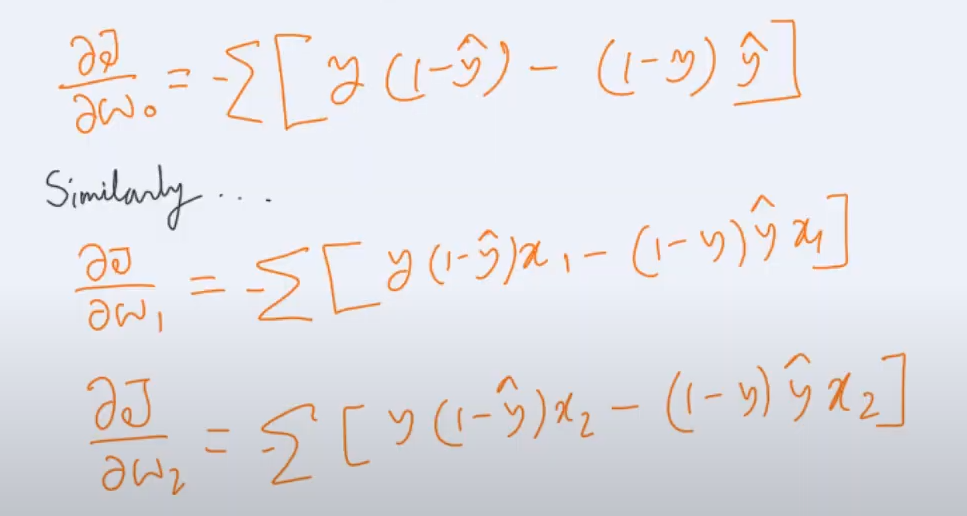

In [13]:
def grad(w, X, Y):
    y_pred = hx(w, X)
    errors = y_pred - Y
    ones = np.ones((X.shape[0], 1))
    X_with_bias = np.hstack([ones, X])
    gradients = np.dot(X_with_bias.T, errors) / Y.size
    return gradients

In [14]:
def descent(w_init, lr, X, Y, max_iter=1000, tolerance=1e-6):
    """
    Perform gradient descent optimization to find the optimal weights.

    Parameters:
    - w_init: Initial weight vector
    - lr: Learning rate (step size) for gradient descent
    - X: Input features as a numpy array
    - Y: Target labels as a numpy array
    - max_iter: Maximum number of iterations for gradient descent (default: 1000)
    - tolerance: Convergence tolerance for stopping criteria (default: 1e-6)

    Returns:
    - Optimized weight vector
    """
    w = w_init
    for j in range(max_iter):
        gradients = grad(w, X, Y)
        w_new = w - lr * gradients
        if np.linalg.norm(w_new - w, 2) < tolerance:
            print(f"Converged after {j + 1} iterations.")
            return w_new
        w = w_new
        if (j + 1) % 100 == 0:
            print(f"Iteration {j + 1}: Cost {cost(w, X, Y)}")
            print(f"Weights: {w}")
    print("Max iterations reached without convergence.")
    return w


Presenting Results Function:

Initializing Parameters

In [15]:
def visualize_evaluation_metrics(y_test, y_pred, y_proba=None):
    """
    Compute evaluation metrics and display visualizations.

    Parameters:
    - y_test: True labels of the test set
    - y_pred: Predicted labels of the test set
    - y_proba: Predicted probabilities

    """

    # Compute evaluation metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred),
        "Log loss": log_loss(y_test, y_pred),
    }

    # Print evaluation metrics
    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()

    # Display Confusion Matrix plot
    cm = confusion_matrix(y_test, y_pred)
    disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp_cm.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # Display ROC Curve plot
    fpr, tpr, _ = roc_curve(y_test, y_proba if y_proba is not None else y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else roc_auc_score(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [16]:
# Initializing the weight vector w_init with zeros, adding one additional element for the bias term.
w_init = np.zeros(X.shape[1] + 1)

# Setting the learning rate lr to 0.01 for gradient descent optimization.
lr = 0.01


Training the Model

In [17]:
# Performing gradient descent optimization to find the optimal weights
w_optimal = descent(w_init, lr, X, y, 1000, 1e-6)

# Print the optimal weights obtained after training the model.
print(f'\nOptimal weights after training Logistic Regression model:')
print(w_optimal)


Iteration 100: Cost 0.4354144569747552
Weights: [-0.25213367  0.06214325 -0.16364031 -0.22027804 -0.12934375 -0.11664533
 -0.06819453 -0.21693991  0.09301912 -0.10129138]
Iteration 200: Cost 0.3798059970753206
Weights: [-0.36956183  0.10632317 -0.23679483 -0.32026913 -0.19576786 -0.16247225
 -0.10838357 -0.32125459  0.13358173 -0.147873  ]
Iteration 300: Cost 0.36189020717787557
Weights: [-0.4342601   0.14340965 -0.27464901 -0.37354977 -0.23816295 -0.18143329
 -0.13765424 -0.38159125  0.15516677 -0.17301437]
Iteration 400: Cost 0.35432965341921785
Weights: [-0.47340047  0.17654133 -0.29543329 -0.40425669 -0.2690011  -0.18772299
 -0.16146321 -0.42064174  0.16806627 -0.18774766]
Iteration 500: Cost 0.3503795840111965
Weights: [-0.4984162   0.20688017 -0.30680088 -0.42246229 -0.29340023 -0.1872079
 -0.18203867 -0.44793453  0.1763724  -0.19671612]
Iteration 600: Cost 0.3479050028352468
Weights: [-0.51500724  0.23495813 -0.31256145 -0.43316069 -0.31386821 -0.18277927
 -0.20047005 -0.4682131

In [18]:
# Computing the predicted probabilities using the trained model and optimal weights.
y_prob = hx(w_optimal, X)

# Converting the predicted probabilities to binary predictions based on a threshold of 0.5.
y_pred = np.array([1 if prob > 0.5 else 0 for prob in y_prob])


Evaluation Metrics:
Accuracy: 0.88
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.5
Log loss: 4.325238406694059



C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


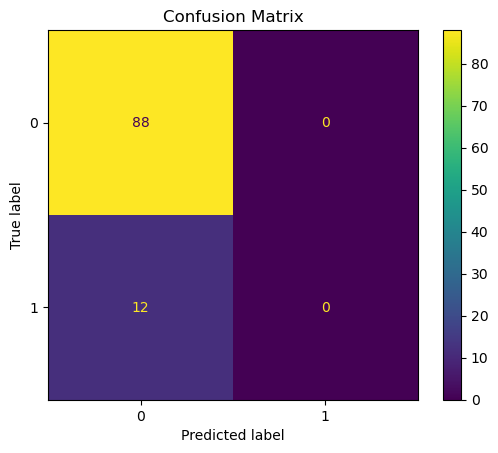

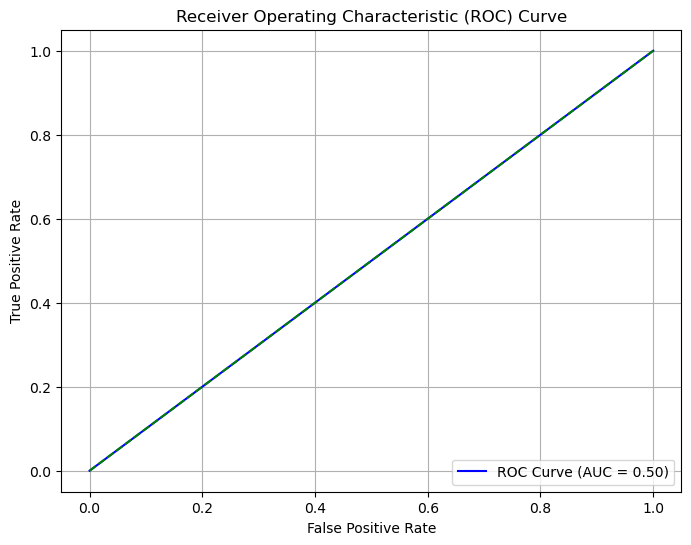

In [19]:
# Generating and displaying evaluation metrics and visualizations for the model's predictions.
visualize_evaluation_metrics(y, y_pred)

# Implementation of Logistic Regression using the Scikit-learn library


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Creating a Logistic Regression classifier instance
clf = LogisticRegression()

In [22]:
# Training the classifier using the provided training data
clf.fit(X, y)

LogisticRegression()

In [23]:
# Calculating and displaying the accuracy score of the classifier
accuracy = clf.score(X, y)
print(f"Accuracy: {accuracy}")

Accuracy: 0.88


In [24]:
# Generating predictions and probabilities using the trained classifier
y_prob_clf = clf.predict_proba(X)
y_pred_clf = clf.predict(X)

Evaluation Metrics:
Accuracy: 0.88
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.5
Log loss: 4.325238406694059



C:\Users\prajw\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


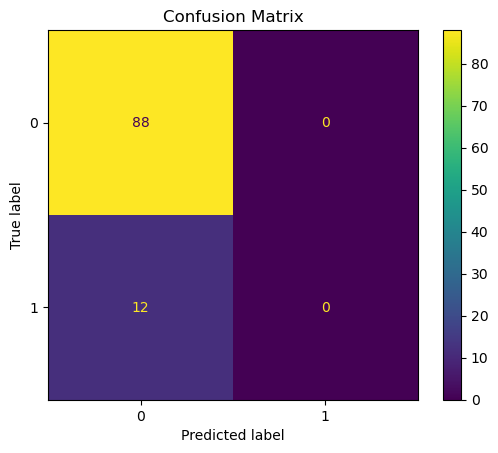

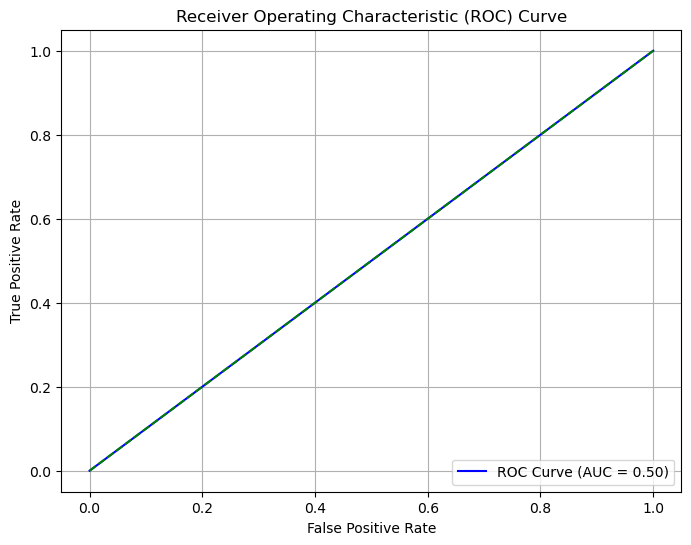

In [25]:
# Calling the generate_results function to evaluate the classifier's predictions
visualize_evaluation_metrics(y, y_pred_clf)

## Result
The results obtained from both the Scratch Logistic Regression implementation and the Logistic Regression implementation using Scikit-Learn are identical and consistent. This consistency indicates that the Scratch implementation accurately replicates the behavior of the Scikit-Learn library methods.

However, an UndefinedMetricWarning is raised, suggesting that the model made no positive predictions, resulting in an ill-defined precision metric. This issue arises because both implementations struggle to predict the 'O' or 1 class, especially in the context of an imbalanced dataset where the 'O' target class is underrepresented, leading to difficulties in learning its patterns.